In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# Dataset 1

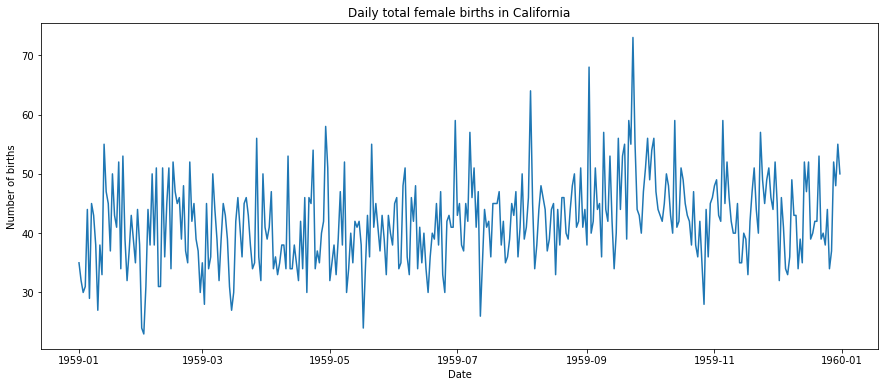

In [8]:
data = pd.read_csv("daily-total-female-births-CA.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date',inplace = True)
plt.figure(figsize=(15,6))
plt.plot(data['births'])
plt.title("Daily total female births in California")
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

The data looks stationary, but we need to apply ADF Test to be sure that the data does not have unit roots and it is stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['births'])
print(f'ADF Statsitic : {adf_test[0]}')
print(f'p-value : {adf_test[1]}')

ADF Statsitic : -4.808291253559764
p-value : 5.2434129901498554e-05


Since the p-value < 0.05 we can say that the data is stationary

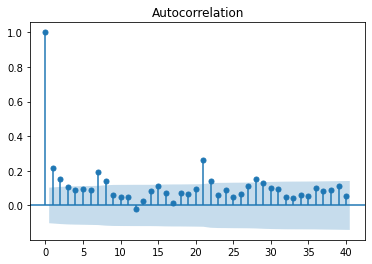

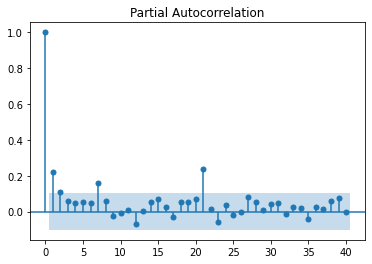

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['births'], lags=40)
plot_pacf(data['births'], lags=40)
plt.show()

We can see that the data is stationary, there are spikes at the first lag in both the PACF and ACF plots, so an ARIMA(1,0,1) would be appropriate for the data

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['births'],order=(1,0,1))
model = model.fit()

In [21]:
forecast = model.get_forecast(steps=30)

In [38]:
from sklearn.metrics import mean_squared_error

train_size = int(len(data)*0.8)
train,test = data[0:train_size], data[train_size:len(data)]

model_train = ARIMA(train['births'], order = (1,0,1))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecasted_series = pd.Series(test_forecast.predicted_mean,index = test.index)

mse = mean_squared_error(test['births'],test_forecasted_series)
rmse = mse**0.5

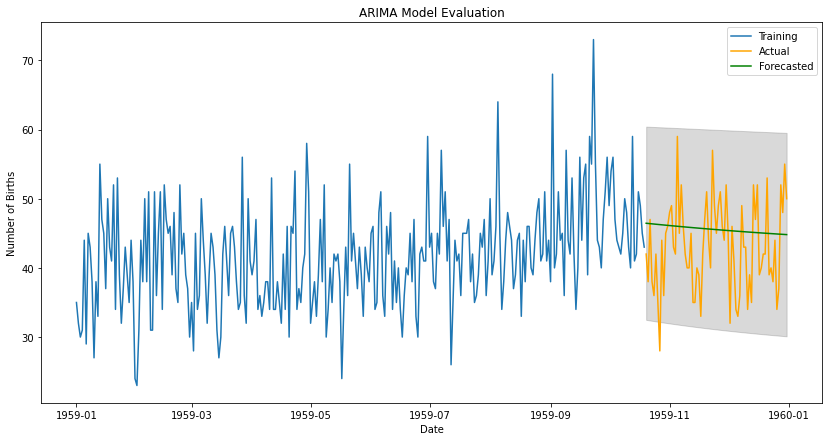

RMSE :  6.970853360372695


In [39]:
plt.figure(figsize=(14,7))
plt.plot(train['births'],label='Training')
plt.plot(test['births'],label='Actual',color='orange')
plt.plot(test_forecasted_series,label ='Forecasted', color = 'green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:,0],
                 test_forecast.conf_int().iloc[:,1],
                 color='k',alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE : ',rmse)

The plot shows the training data, the actual values, test values and the Forecasted values, and 95% confidence interval, which is the shaded region.

The model cannot capture any within sample variability, as ARIMA models are much better suited for data with some trend or seasonality, which this data does not have

The RMSE gives an indication of forecast accuracy, which here is 6.97, which is not good, indicating some other model would work better.

# Dataset 2

In [100]:
data = pd.read_excel('India_Exchange_Rate_Dataset.xls')

In [101]:
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.set_index('observation_date',inplace=True)

In [102]:
data

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


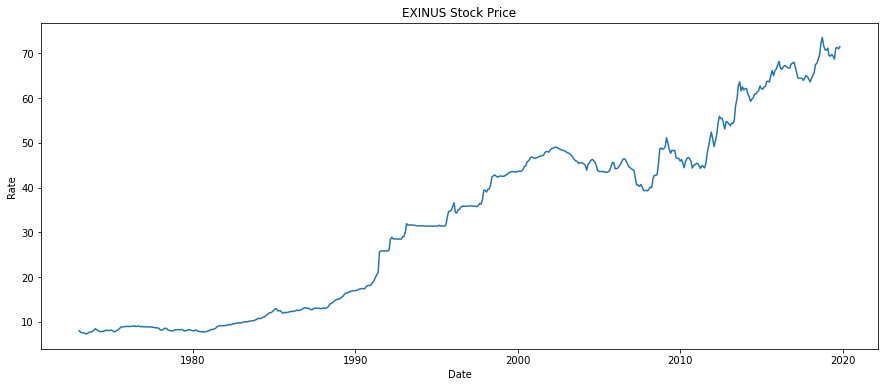

In [103]:
plt.figure(figsize=(15,6))
plt.plot(data['EXINUS'])
plt.title("EXINUS Stock Price")
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()

We can clearly see that the data has a trend but we will perfom ADF Test just to be sure

In [105]:
adf_test = adfuller(data['EXINUS'])
print(f'ADF Statsitic : {adf_test[0]}')
print(f'p-value : {adf_test[1]}')

ADF Statsitic : 0.8058173265436772
p-value : 0.9917294926189396


As the p-value is greater than 0.05, there is a unit root present, and the data is not stationary

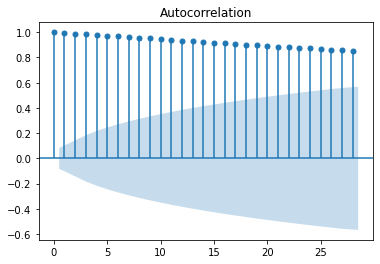

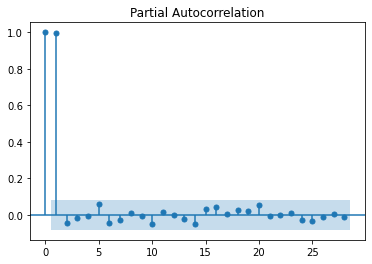

In [106]:
plot_acf(data['EXINUS'])
plot_pacf(data['EXINUS'])
plt.show()

We can see that the data in not stationary, and the ACF plot shows a decaying graph, and the PACF plot show that corelation in the first 2 lag values, so a ARIMA(2,1,1), would be appropriate

In [132]:
train_size = int(len(data)*0.8)
train,test = data[0:train_size], data[train_size:len(data)]

model_train = ARIMA(train['EXINUS'], order = (3,2,3))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecasted_series = pd.Series(test_forecast.predicted_mean,index = test.index)

mse = mean_squared_error(test['EXINUS'],test_forecasted_series)
rmse = mse**0.5

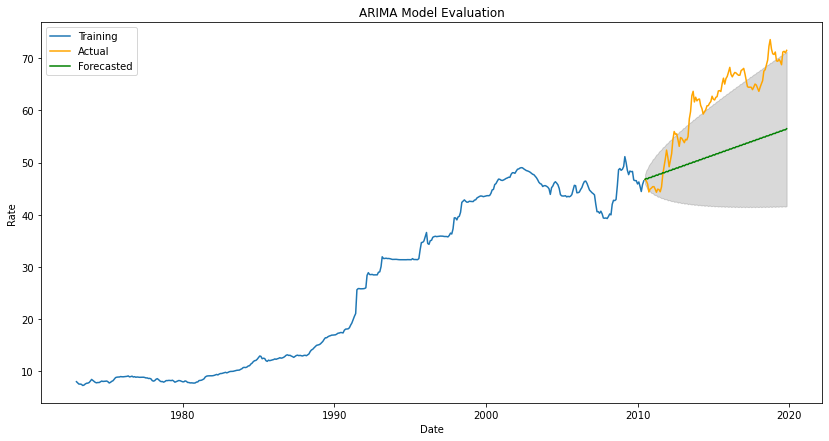

RMSE :  10.724079212333676


In [131]:
plt.figure(figsize=(14,7))
plt.plot(train['EXINUS'],label='Training')
plt.plot(test['EXINUS'],label='Actual',color='orange')
plt.plot(test_forecasted_series,label ='Forecasted', color = 'green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:,0],
                 test_forecast.conf_int().iloc[:,1],
                 color='k',alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

print('RMSE : ',rmse)

After testing the various values of p,d,q for we see that RMSE is the least for ARIMA(3,2,3) so this model will be much more accurate.

# Conclusion
ARIMA (AutoRegressive Integrated Moving Average) is a powerful statistical method used for time series forecasting. It combines autoregressive and moving average components, along with differencing to achieve stationarity. ARIMA is particularly effective for univariate data, allowing us to model complex patterns and make informed predictions. Its flexibility and robustness make it a popular choice in various fields, from finance to economics, although it requires careful parameter selection and validation to ensure accurate forecasts.